<a href="https://colab.research.google.com/github/junskku/practicaldeep-learning/blob/main/10%EC%A3%BC%EC%B0%A8_%EA%B3%BC%EC%A0%9C_%EC%9E%91%EC%84%B1(%EA%B0%9C%EC%84%A0%EB%AA%A8%EB%8D%B8).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#파일 업로드
from google.colab import files
uploaded = files.upload()

# 업로드된 파일 목록 확인
for fn in uploaded.keys():
    print(f'User uploaded file "{fn}" with length {len(uploaded[fn])} bytes')

Saving all_stocks_5yr.csv to all_stocks_5yr.csv
User uploaded file "all_stocks_5yr.csv" with length 29580549 bytes


In [3]:
# 데이터 처리를 위한 pandas 라이브러리를 pd라는 이름으로 가져옵니다.
import pandas as pd

# 수치 계산을 위한 numpy 라이브러리를 np라는 이름으로 가져옵니다.
import numpy as np

# 데이터 정규화를 위한 MinMaxScaler를 가져옵니다.
from sklearn.preprocessing import MinMaxScaler

# 그래프를 그리기 위한 matplotlib의 pyplot 모듈을 plt라는 이름으로 가져옵니다.
import matplotlib.pyplot as plt

In [4]:
# CSV 파일 불러오기
data = pd.read_csv('all_stocks_5yr.csv')

# 데이터의 처음 5행을 출력하여 파일이 올바르게 불러와졌는지 확인합니다.
print(data.head())


         date   open   high    low  close    volume Name
0  2013-02-08  15.07  15.12  14.63  14.75   8407500  AAL
1  2013-02-11  14.89  15.01  14.26  14.46   8882000  AAL
2  2013-02-12  14.45  14.51  14.10  14.27   8126000  AAL
3  2013-02-13  14.30  14.94  14.25  14.66  10259500  AAL
4  2013-02-14  14.94  14.96  13.16  13.99  31879900  AAL


In [5]:
# 결측치가 있는 행을 제거합니다.
data = data.dropna()

# 'AAPL' 주식의 데이터를 선택합니다.
stock_data = data[data['Name'] == 'AAPL']

# 'date' 컬럼을 datetime 타입으로 변환합니다.
stock_data['date'] = pd.to_datetime(stock_data['date'])

# 'date'를 기준으로 데이터를 정렬합니다.
stock_data = stock_data.sort_values('date')

# 'date' 컬럼을 인덱스로 설정합니다.
stock_data.set_index('date', inplace=True)

<ipython-input-5-6e0fbb0c5b78>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['date'] = pd.to_datetime(stock_data['date'])


In [6]:
# 종가(close)만 사용하여 데이터를 정규화합니다.
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(stock_data['close'].values.reshape(-1, 1))

# 학습 데이터를 생성하는 함수를 정의합니다.
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step - 1):
        # time_step 길이만큼의 시퀀스를 만듭니다.
        a = dataset[i:(i + time_step), 0]
        dataX.append(a)
        # 시퀀스의 다음 값을 예측 값으로 설정합니다.
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

# 시퀀스 길이를 60으로 설정합니다.
time_step = 60

# 시퀀스 데이터를 생성합니다.
X, y = create_dataset(scaled_data, time_step)

# 학습 데이터와 테스트 데이터로 분리합니다 (80% 학습, 20% 테스트).
train_size = int(len(X) * 0.8)
test_size = len(X) - train_size
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# 데이터 형태를 LSTM 입력 형태에 맞게 변환합니다 [samples, time steps, features].
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# 학습 데이터와 테스트 데이터의 형태를 출력합니다.
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(958, 60, 1) (958,)
(240, 60, 1) (240,)


Epoch 1/100
30/30 [==============================] - 9s 126ms/step - loss: 0.0161 - val_loss: 0.0146
Epoch 2/100
30/30 [==============================] - 4s 127ms/step - loss: 0.0018 - val_loss: 0.0011
Epoch 3/100
30/30 [==============================] - 4s 133ms/step - loss: 0.0015 - val_loss: 0.0011
Epoch 4/100
30/30 [==============================] - 3s 102ms/step - loss: 0.0014 - val_loss: 0.0015
Epoch 5/100
30/30 [==============================] - 3s 102ms/step - loss: 0.0014 - val_loss: 0.0029
Epoch 6/100
30/30 [==============================] - 4s 122ms/step - loss: 0.0013 - val_loss: 0.0014
Epoch 7/100
30/30 [==============================] - 4s 134ms/step - loss: 0.0014 - val_loss: 0.0023
Epoch 8/100
30/30 [==============================] - 3s 99ms/step - loss: 0.0013 - val_loss: 9.4989e-04
Epoch 9/100
30/30 [==============================] - 3s 100ms/step - loss: 0.0014 - val_loss: 0.0016
Epoch 10/100
30/30 [==============================] - 3s 105ms/step - loss: 0.0012 - val

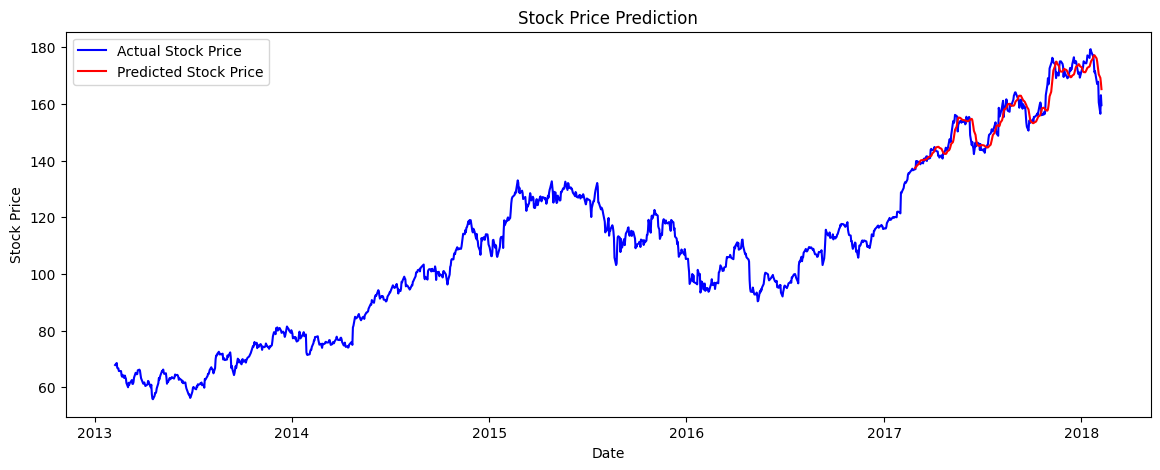

In [8]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 로드
# stock_data = pd.read_csv('your_stock_data.csv')  # 필요에 따라 데이터 로드 방법 조정

# 데이터 전처리
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(stock_data['close'].values.reshape(-1, 1))

# 시퀀스 데이터 생성
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i + time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

time_step = 60
X, y = create_dataset(scaled_data, time_step)

# 학습 데이터와 테스트 데이터로 분리
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# 데이터 형태를 LSTM 입력 형태에 맞게 변환
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# 모델 구축
def build_model(units, dropout_rate):
    model = Sequential()
    model.add(LSTM(units=units, return_sequences=True, input_shape=(time_step, 1)))
    model.add(Dropout(dropout_rate))
    model.add(LSTM(units=units, return_sequences=False))
    model.add(Dropout(dropout_rate))
    model.add(Dense(units=1))
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
    return model

# 모델 빌드
model = build_model(units=100, dropout_rate=0.2)

# 조기 종료 설정
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# 모델 학습
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])

# 예측 수행
predicted_stock_price = model.predict(X_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

# 전체 데이터에 대한 예측 수행
total_dataset = np.concatenate((X_train, X_test), axis=0)
total_predicted = model.predict(total_dataset)
total_predicted = scaler.inverse_transform(total_predicted)

# 시각화
plt.figure(figsize=(14, 5))
plt.plot(stock_data.index, stock_data['close'], color='blue', label='Actual Stock Price')
plt.plot(stock_data.index[-len(y_test):], predicted_stock_price, color='red', label='Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


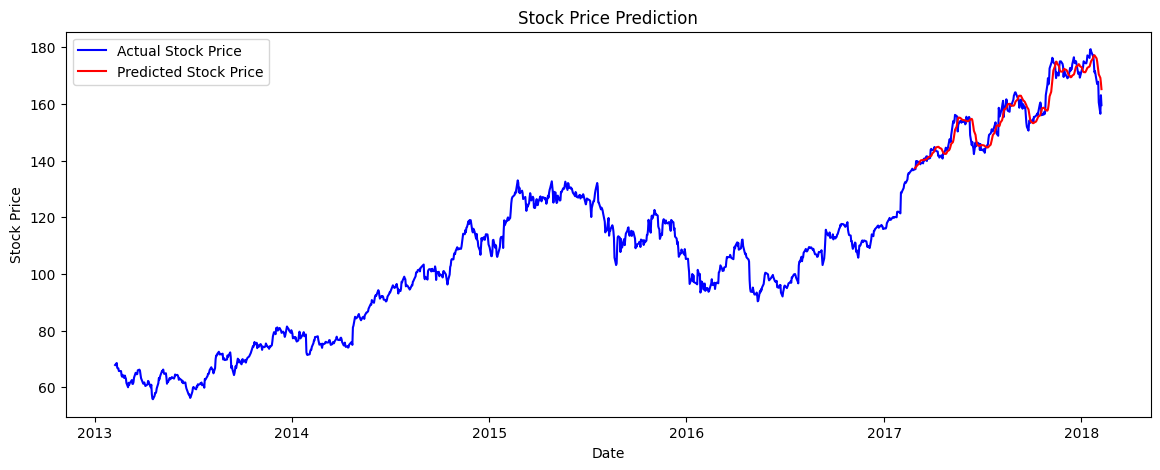

In [9]:
# 실제 주가와 예측된 주가를 시각화하기 위해 matplotlib와 datetime 모듈을 가져옵니다.
import matplotlib.pyplot as plt
import datetime

# 실제 주가와 예측된 주가 시각화
plt.figure(figsize=(14, 5))
plt.plot(stock_data.index, stock_data['close'], color='blue', label='Actual Stock Price')
plt.plot(stock_data.index[-len(y_test):], predicted_stock_price, color='red', label='Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

1/1 [==============================] - 0s 59ms/step


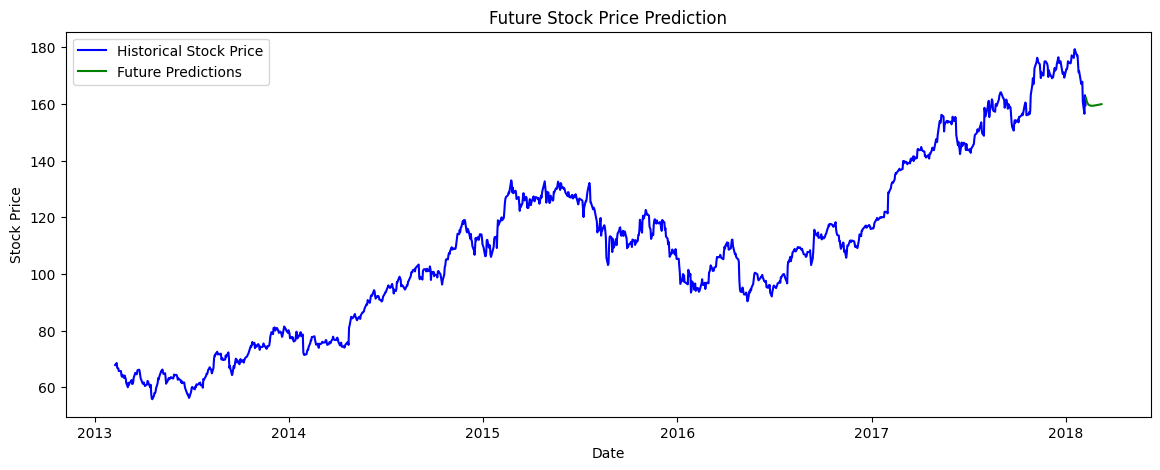

In [10]:
# 미래 주가를 예측할 일 수를 설정합니다 (예: 30일).
future_days = 30
future_predictions = []

# 마지막 시퀀스를 가져옵니다.
last_sequence = scaled_data[-time_step:]
current_sequence = last_sequence

# 미래 주가를 예측합니다.
for _ in range(future_days):
    # 현재 시퀀스를 사용하여 다음 값을 예측합니다.
    next_prediction = model.predict(current_sequence.reshape(1, time_step, 1))
    future_predictions.append(next_prediction[0, 0])
    # 시퀀스에서 가장 오래된 값을 제거하고, 새로운 예측 값을 추가합니다.
    current_sequence = np.append(current_sequence[1:], next_prediction, axis=0)

# future_predictions 리스트를 NumPy 배열로 변환합니다.
future_predictions = np.array(future_predictions)

# 예측된 미래 주가를 원래 스케일로 되돌립니다.
future_predictions = scaler.inverse_transform(future_predictions.reshape(-1, 1))

# 마지막 날짜부터 미래 날짜를 생성합니다.
last_date = stock_data.index[-1]
future_dates = [last_date + datetime.timedelta(days=i) for i in range(1, future_days + 1)]

# 예측 결과 시각화
plt.figure(figsize=(14, 5))
plt.plot(stock_data.index, stock_data['close'], color='blue', label='Historical Stock Price')
plt.plot(future_dates, future_predictions, color='green', label='Future Predictions')
plt.title('Future Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

1/1 [==============================] - 0s 52ms/step


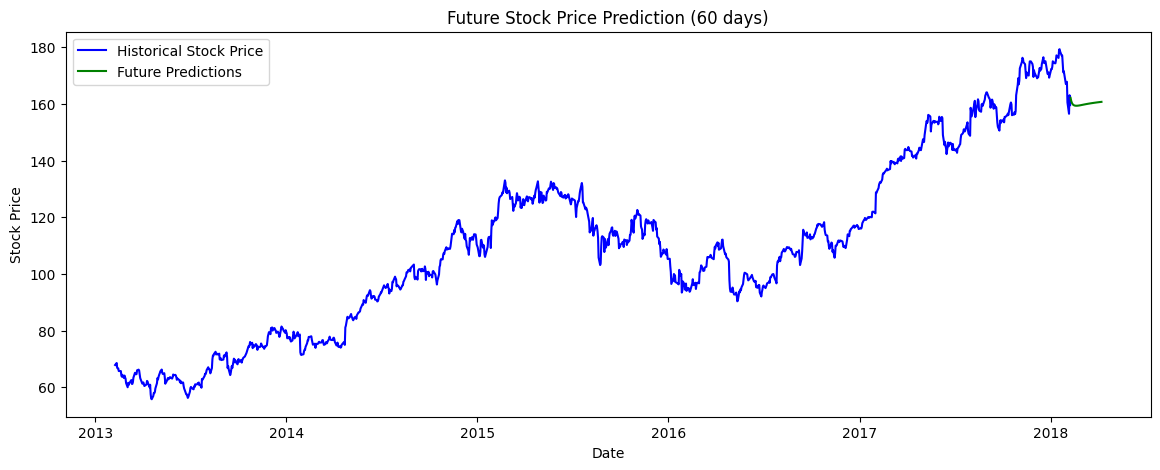

In [11]:
# 미래 주가를 예측할 일 수를 60일로 설정합니다.
future_days = 60
future_predictions = []

# 마지막 시퀀스를 가져옵니다.
last_sequence = scaled_data[-time_step:]
current_sequence = last_sequence

# 60일 동안 미래 주가를 예측합니다.
for _ in range(future_days):
    # 현재 시퀀스를 사용하여 다음 값을 예측합니다.
    next_prediction = model.predict(current_sequence.reshape(1, time_step, 1))
    future_predictions.append(next_prediction[0, 0])
    # 시퀀스에서 가장 오래된 값을 제거하고, 새로운 예측 값을 추가합니다.
    current_sequence = np.append(current_sequence[1:], next_prediction, axis=0)

# future_predictions 리스트를 NumPy 배열로 변환합니다.
future_predictions = np.array(future_predictions)

# 예측된 미래 주가를 원래 스케일로 되돌립니다.
future_predictions = scaler.inverse_transform(future_predictions.reshape(-1, 1))

# 마지막 날짜부터 미래 날짜를 생성합니다.
last_date = stock_data.index[-1]
future_dates = [last_date + datetime.timedelta(days=i) for i in range(1, future_days + 1)]

# 예측 결과 시각화
plt.figure(figsize=(14, 5))
plt.plot(stock_data.index, stock_data['close'], color='blue', label='Historical Stock Price')
plt.plot(future_dates, future_predictions, color='green', label='Future Predictions')
plt.title('Future Stock Price Prediction (60 days)')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

8/8 [==============================] - 1s 17ms/step
Units: 50, Dropout: 0.2


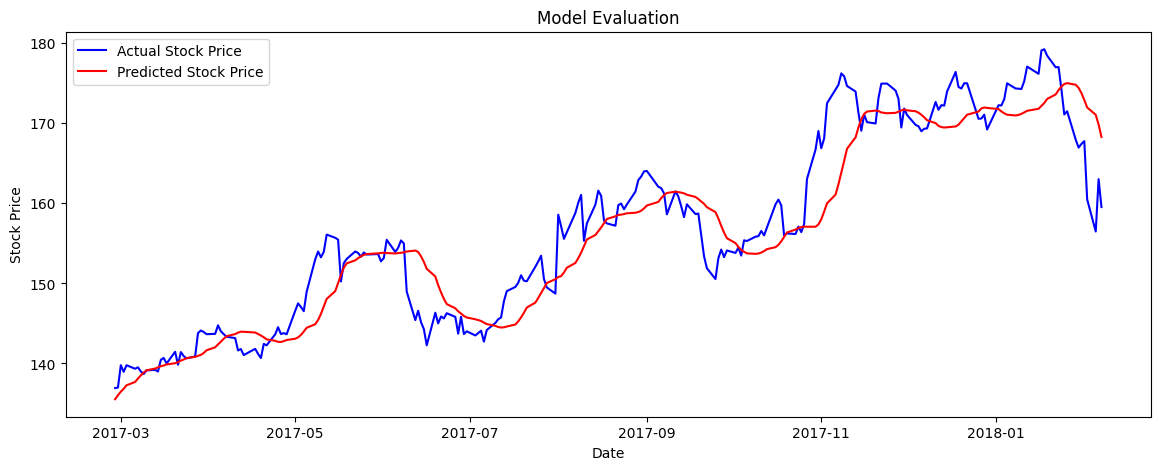

8/8 [==============================] - 1s 14ms/step
Units: 50, Dropout: 0.5


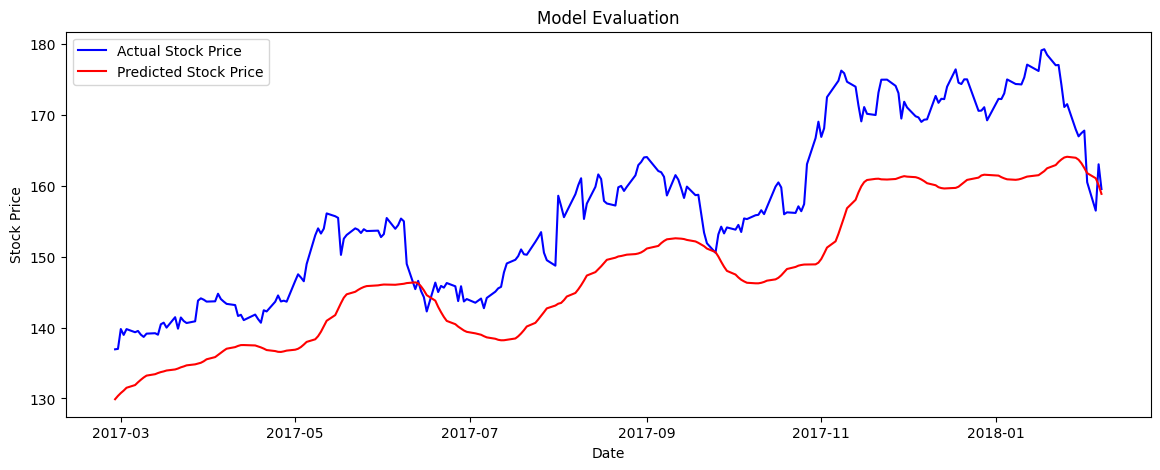

8/8 [==============================] - 1s 28ms/step
Units: 100, Dropout: 0.2


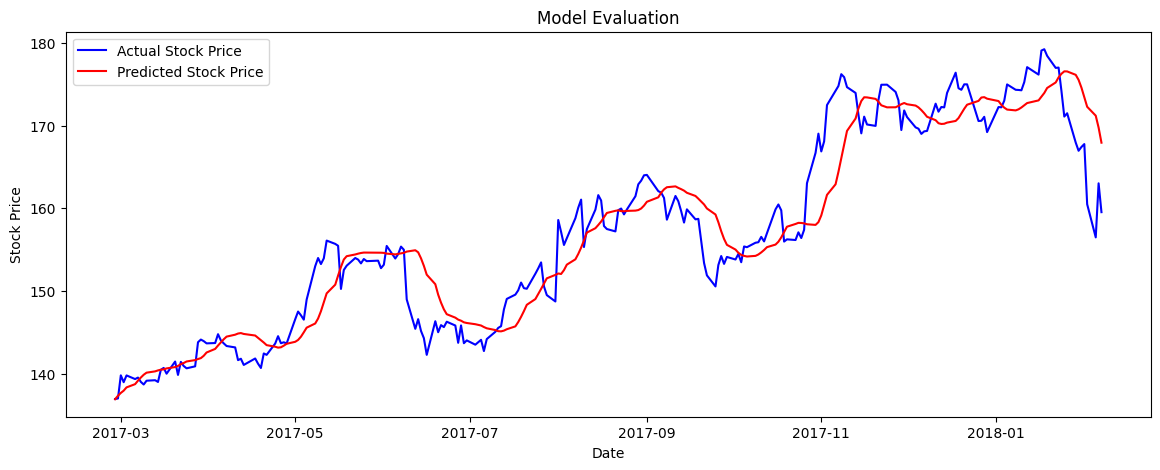

8/8 [==============================] - 1s 29ms/step
Units: 100, Dropout: 0.5


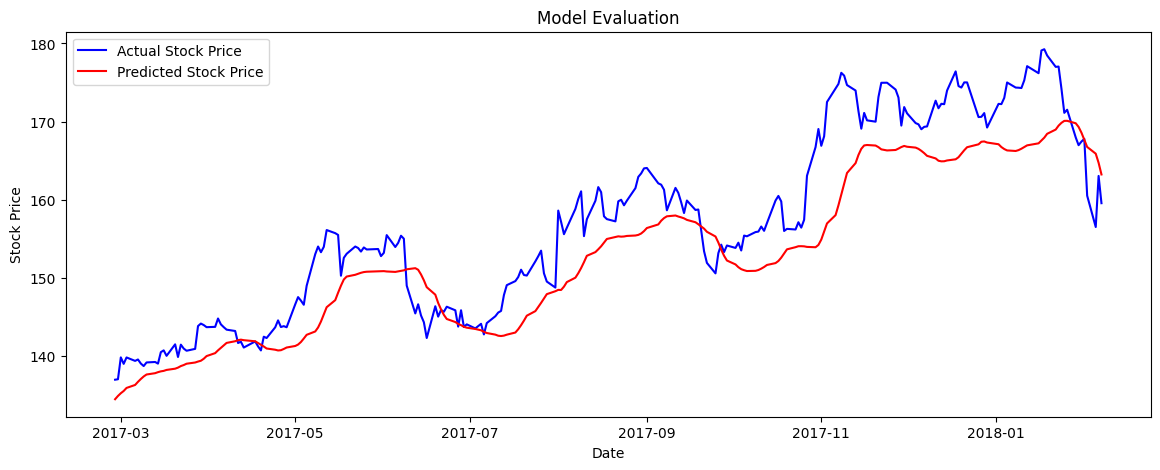

In [12]:
# 모델을 평가하는 함수를 정의합니다.
def evaluate_model(actual, predicted):
    plt.figure(figsize=(14, 5))
    plt.plot(stock_data.index[-len(actual):], actual, color='blue', label='Actual Stock Price')
    plt.plot(stock_data.index[-len(predicted):], predicted, color='red', label='Predicted Stock Price')
    plt.title('Model Evaluation')
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.show()

# 다양한 LSTM 모델을 구성하고 평가합니다.
def build_model(units, dropout_rate):
    model = Sequential()
    model.add(LSTM(units=units, return_sequences=True, input_shape=(time_step, 1)))
    model.add(Dropout(dropout_rate))
    model.add(LSTM(units=units, return_sequences=False))
    model.add(Dropout(dropout_rate))
    model.add(Dense(units=1))

    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# 유닛 수와 드롭아웃 비율의 조합을 정의합니다.
units_options = [50, 100]
dropout_options = [0.2, 0.5]

# 각 조합에 대해 모델을 훈련시키고 평가합니다.
for units in units_options:
    for dropout_rate in dropout_options:
        model = build_model(units, dropout_rate)
        model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)
        predicted_stock_price = model.predict(X_test)
        predicted_stock_price = scaler.inverse_transform(predicted_stock_price)
        print(f'Units: {units}, Dropout: {dropout_rate}')
        evaluate_model(stock_data['close'][-len(y_test):].values, predicted_stock_price.flatten())

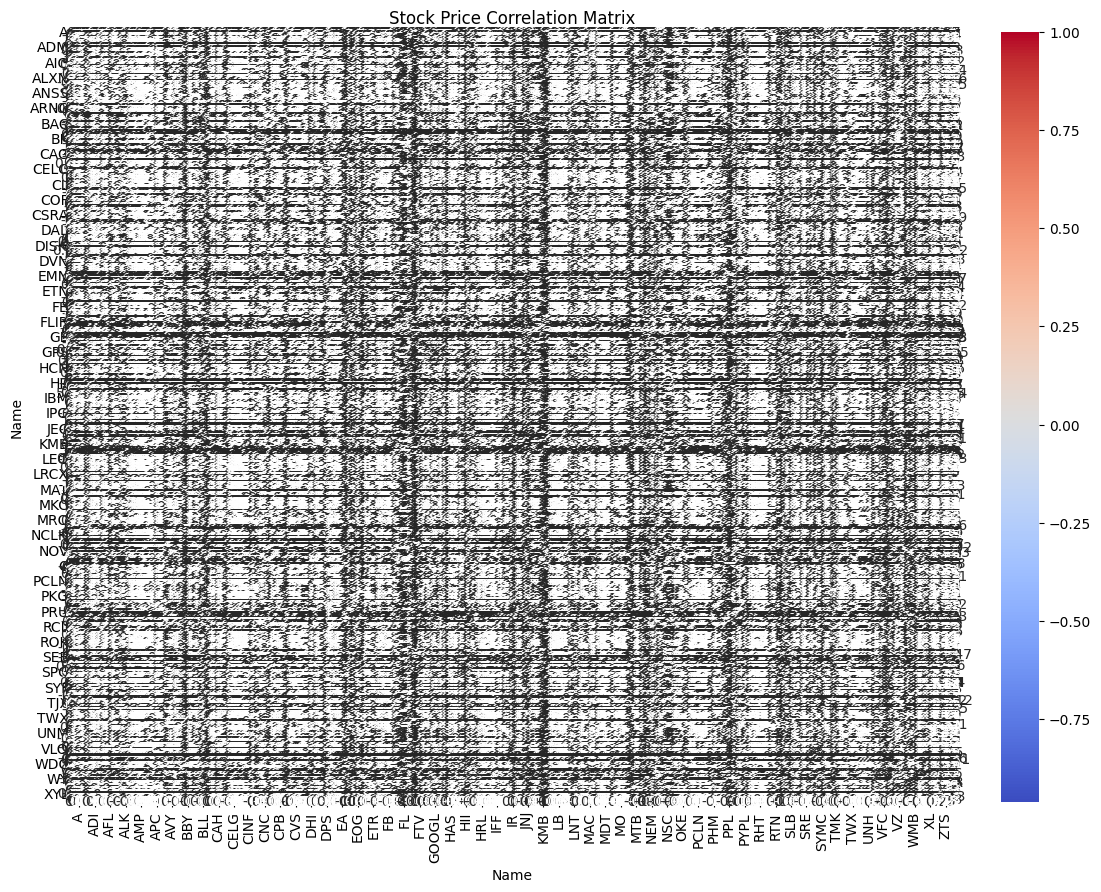

In [13]:
# 주식 간의 상관 관계를 분석하기 위해 seaborn을 가져옵니다.
import seaborn as sns

# 주식 간의 상관 관계를 분석하기 위해 피벗 테이블을 생성합니다.
# 'date'를 인덱스로, 'Name'을 열로, 'close'를 값으로 설정합니다.
corr_data = data.pivot(index='date', columns='Name', values='close').corr()

# 상관 관계를 시각화합니다.
plt.figure(figsize=(14, 10))
sns.heatmap(corr_data, annot=True, cmap='coolwarm')
plt.title('Stock Price Correlation Matrix')
plt.show()

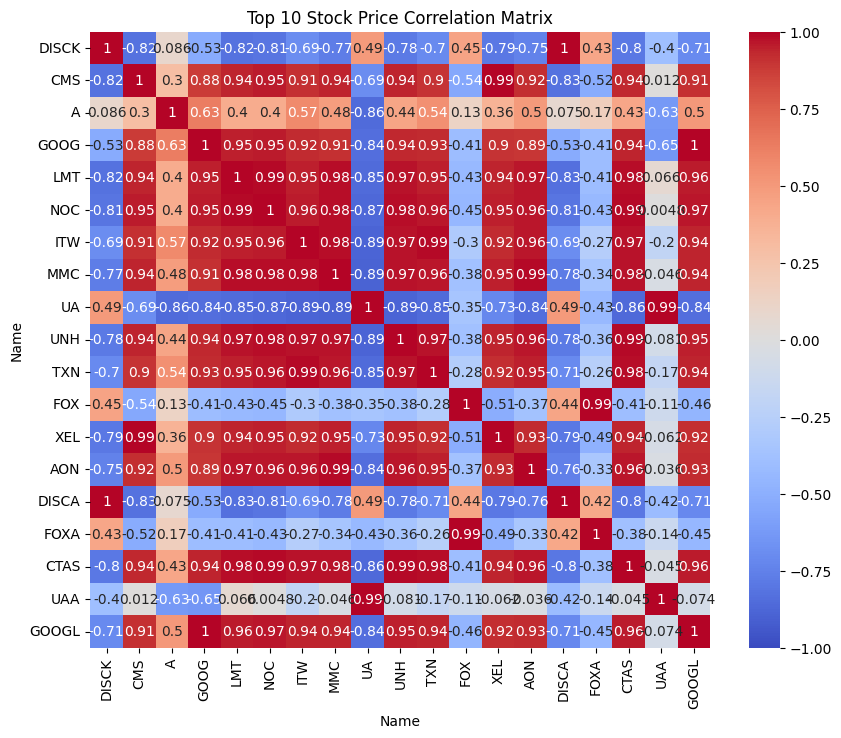

In [14]:
# 상관 계수의 절댓값이 가장 큰 상위 10개 주식을 선택합니다.
corr_data = data.pivot(index='date', columns='Name', values='close').corr()
top_10_corr = corr_data.abs().unstack().sort_values(ascending=False).drop_duplicates().head(10)

# 상위 10개 주식의 이름을 추출합니다.
top_10_stocks = list(set(top_10_corr.index.get_level_values(0)).union(set(top_10_corr.index.get_level_values(1))))

# 상위 10개 주식만을 포함한 상관 행렬을 만듭니다.
top_10_corr_matrix = corr_data.loc[top_10_stocks, top_10_stocks]

# 상관 행렬을 시각화합니다.
plt.figure(figsize=(10, 8))
sns.heatmap(top_10_corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Top 10 Stock Price Correlation Matrix')
plt.show()

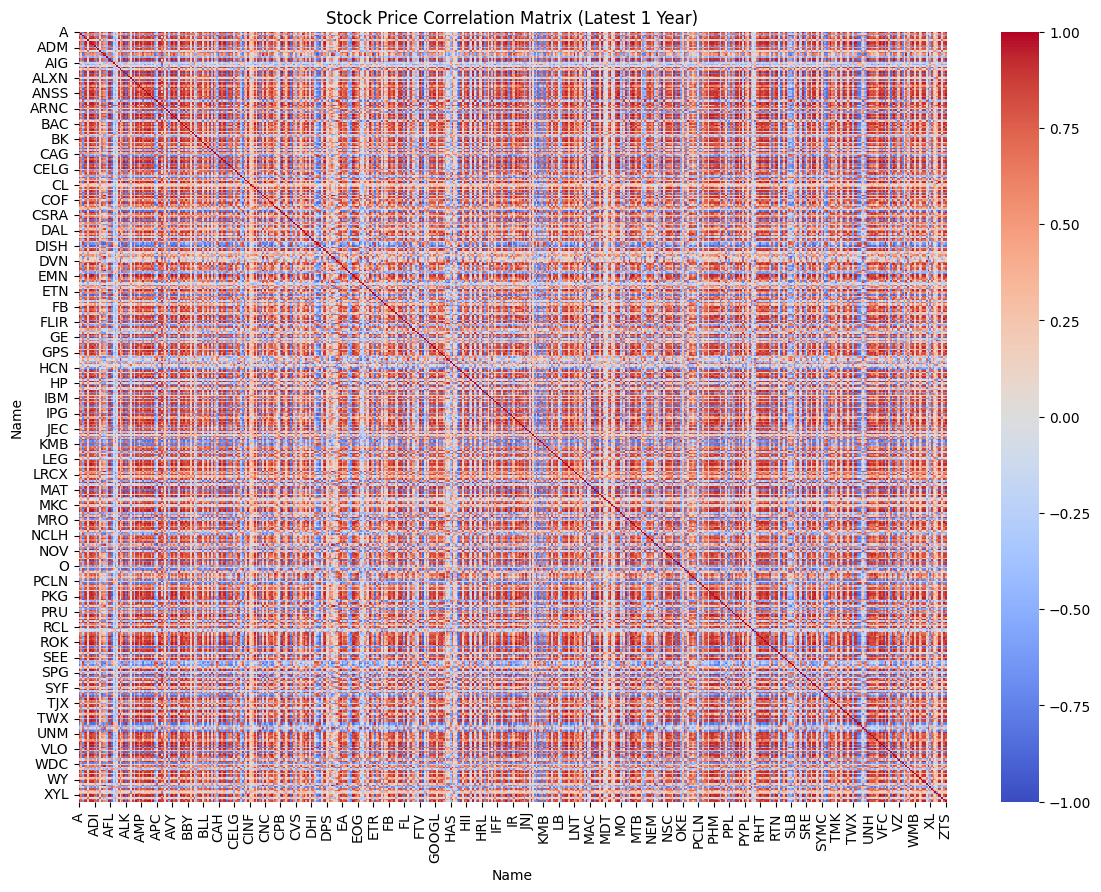

In [15]:
# 'date' 컬럼을 datetime 타입으로 변환합니다.
data['date'] = pd.to_datetime(data['date'])

# 데이터의 최신 1년치를 선택합니다.
latest_year_data = data[data['date'] >= (data['date'].max() - pd.DateOffset(years=1))]

# 특정 기간 동안의 상관 행렬을 만듭니다.
latest_corr_data = latest_year_data.pivot(index='date', columns='Name', values='close').corr()

# 상관 행렬을 시각화합니다.
plt.figure(figsize=(14, 10))
sns.heatmap(latest_corr_data, annot=False, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Stock Price Correlation Matrix (Latest 1 Year)')
plt.show()

In [ ]:
# 실제 주가와 예측된 주가를 비교하여 데이터프레임을 생성합니다.
predicted_df = pd.DataFrame({
    'Date': stock_data.index[-len(y_test):],
    'Actual': stock_data['close'][-len(y_test):].values,
    'Predicted': predicted_stock_price.flatten()
})

# 예측 결과를 'predicted_stock_prices.csv' 파일로 저장합니다.
predicted_df.to_csv('predicted_stock_prices.csv', index=False)